# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

###### Data we choose: Web Analytics in NYC
We chose the data of web analytics in New York City, which provides data about views and visits of governmental websites in NYC because we are interested in the relationship between the influencing factors of the website views and average time. The dataset contains 16008 records, including page URL, page Title, views, visits and average time. 

In [1]:
!wget https://raw.githubusercontent.com/JefferyBA/istm-6212/master/NYC.gov_Web_Analytics.csv

--2016-11-11 13:40:19--  https://raw.githubusercontent.com/JefferyBA/istm-6212/master/NYC.gov_Web_Analytics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2040659 (1.9M) [text/plain]
Saving to: ‘NYC.gov_Web_Analytics.csv’

NYC.gov_Web_Analyti 100%[=====================>]   1.95M  --.-KB/s   in 0.04s  

2016-11-11 13:40:19 (47.3 MB/s) - ‘NYC.gov_Web_Analytics.csv’ saved [2040659/2040659]



In [2]:
!mv NYC.gov_Web_Analytics.csv web.csv

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

###### There are 6 columns in the web analytics data. They are:
1.Time period: the time. 

2.page: the Website URL.

3.Title: the web searching key words or questions.

4.Visits: a visit is a series of page views, beginning when a visitor’s browser requests the first page from the server, and ending when the visitor leaves the site or remains idle beyond the idle-time limit.

5.Views: a page that is displayed by a browser. This term is often used loosely to include page files that are delivered to a browser, whether or not they are displayed on the screen. An example of a page view that is not actually displayed is a redirect page.

6.Average Time Viewed (seconds): the average seconds the viewer spends on the web page. 

We are interested in views, visits and the average time viewed most since we can use the data to predict what improvements we can make to attract more pepole to the website and to make them spend more time. 

In [3]:
!wc -l web.csv

16009 web.csv


In [20]:
!csvcut -n web.csv

  1: Time Period
  2: Page
  3: Title
  4: Visits
  5: Views
  6: Average Time Viewed (seconds)


###### Let's take a look at the data. 

In [21]:
!head -5 web.csv | csvlook

|--------------+----------------------------------------------------------------------------+------------------------------------------+--------+----------+--------------------------------|
|  Time Period | Page                                                                       | Title                                    | Visits | Views    | Average Time Viewed (seconds)  |
|--------------+----------------------------------------------------------------------------+------------------------------------------+--------+----------+--------------------------------|
|  Jul-15      |                                                                            |                                          |        | 23123911 | 96.5                           |
|  Jul-15      | http://www1.nyc.gov/                                                       | Welcome to NYC.gov | City of New York    | 551941 | 715124   | 68.02                          |
|  Jul-15      | http://www1.nyc.gov/site/finance/

According to the csvstat, there are 3 columns in the data contain NULL value, they are: Page, Title, Visits. 

In [22]:
!csvstat web.csv

  1. Time Period
	<class 'datetime.date'>
	Nulls: False
	Min: 9999-01-16
	Max: 9999-12-15
	Unique values: 8
	5 most frequent values:
		9999-08-15:	2001
		9999-07-15:	2001
		9999-09-15:	2001
		9999-10-15:	2001
		9999-02-16:	2001
  2. Page
	<class 'str'>
	Nulls: True
	Unique values: 3202
	5 most frequent values:
		http://www1.nyc.gov/site/severeweather/:	8
		http://www.nyc.gov/html/doc/html/job/aiu_unit.shtml:	8
		http://www.nyc.gov/html/records/html/archives/marriage.shtml:	8
		http://www1.nyc.gov/assets/finance/jump/ezfleet.html:	8
		http://www.nyc.gov/html/dob/html/safety/ecb_violation.shtml:	8
	Max length: 149
  3. Title
	<class 'str'>
	Nulls: True
	Unique values: 2583
	5 most frequent values:
		NYPD - Precincts:	618
		Department of Buildings:	538
		Office of Payroll Administration:	164
		NYC Zoning - Zoning Districts:	146
		City of New York Department of Correction:	130
	Max length: 179
  4. Visits
	<class 'int'>
	Nulls: True
	Min: 694
	Max: 763550
	Sum: 104748904
	Mean: 6546.8065
	

###### Questions we are interested in: 
We are interested in the relationship between the vistis, views, and the average time viewed. Is there any positive or negative correlation relationship? If the correlation exits, how can we make full use of those information in the future to optimize website. 

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [4]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [5]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [6]:
!createdb -U dbuser project02

In [7]:
%sql postgresql://dbuser@localhost:5432/project02

'Connected: dbuser@project02'

###### Here we are creating the table and inserting all the columns into it.

In [8]:
%%sql
DROP TABLE IF EXISTS webnyc;
CREATE TABLE webnyc
(
 Time_Period VARCHAR(80),
 Page  TEXT,
 Title  VARCHAR(255),
 Visits INTEGER,
 Views  INTEGER,
 Average_Time_Viewed FLOAT
)

Done.
Done.


[]

In [9]:
!pwd

/home/jovyan/work


In [10]:
%%sql
COPY webnyc FROM '/home/jovyan/work/web.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

16008 rows affected.


[]

In [30]:
%%sql
SELECT * FROM webnyc
LIMIT 10;

10 rows affected.


[('Jul-15', None, None, None, 23123911, 96.5),
 ('Jul-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 551941, 715124, 68.02),
 ('Jul-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 470528, 903463, 41.9),
 ('Jul-15', 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', 'Pay Parking and Camera Violations Online', 361846, 548096, 313.0),
 ('Jul-15', 'http://www.nyc.gov/html/dob/html/home/home.shtml', 'Department of Buildings', 321598, 589963, 193.77),
 ('Jul-15', 'http://www1.nyc.gov/site/finance/', 'NYC Department of Finance', 296965, 410435, 75.41),
 ('Jul-15', 'http://www1.nyc.gov/jobs/', 'Jobs | City of New York', 219977, 536295, 129.61),
 ('Jul-15', 'http://www.nyc.gov/html/dcas/html/work/exam_monthly.shtml', 'DCAS - Work for the City - DCAS Monthly Exam Schedule', 216068, 400999, 145.88),
 ('Jul-15', 'http://www1.nyc.gov/home/search/', 'Search Results | City of New York', 180387, 469624, 30.52),
 ('Jul-15', 'http://www.nyc.gov/html/dob/html/bis/bis.shtml', 'Department of Buildings - Buildings Information System (BIS)', 152489, 254334, 245.17)]

In [31]:
%%sql
SELECT COUNT(*) FROM webnyc;

1 rows affected.


[(16008,)]

###### Here we are using special case to represent the NULL Value in column Page, Title and Visits.

In [32]:
%%sql
UPDATE webnyc
SET Title = 'NA'
WHERE Title is NULL;

62 rows affected.


[]

In [33]:
%%sql
UPDATE webnyc
SET Page = 'NA' 
WHERE Page is NULL;

9 rows affected.


[]

In [34]:
%%sql
UPDATE webnyc
SET Visits = 0 
WHERE Visits is NULL;

8 rows affected.


[]

######  We explore the exact number of distinct pages and title and time periods we study.

In [35]:
%%sql
SELECT COUNT(*),'Page' as attribute_name FROM (SELECT DISTINCT Page FROM webnyc)table1 
UNION 
SELECT COUNT(*),'Title' as attribute_name FROM (SELECT DISTINCT Title FROM webnyc)table2
UNION
SELECT COUNT(*),'Time_period' as attribute_name FROM (SELECT DISTINCT time_period FROM webnyc)table3

3 rows affected.


[(3203, 'Page'), (2584, 'Title'), (8, 'Time_period')]

###### Now we begin exploring the data:
Firstly, we find the website with most Views in all the time periods by the query below.

In [36]:
%%sql
SELECT *
FROM webnyc
WHERE Page!='NA' AND Title!='NA'
ORDER BY Views DESC
LIMIT 10;

10 rows affected.


[('Jan-16', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 763550, 992928, 68.03),
 ('Oct-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 477267, 911602, 41.57),
 ('Jul-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 470528, 903463, 41.9),
 ('Dec-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 469052, 890949, 39.59),
 ('Nov-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 466874, 889667, 40.68),
 ('Feb-16', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 656692, 840691, 71.01),
 ('Jan-16', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 442538, 833263, 40.2),
 ('Aug-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 441743, 833030, 43.52),
 ('Sep-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 433703, 817927, 41.83),
 ('Oct-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 618288, 786825, 69.0)]

Then we try to find the intersaction among 100 website with most views and 100 website with most Visits to find whether they are related to each other.There are 77 websites. So we can conclude that most website with more views have more visits. 

In [37]:
%%sql
SELECT * 
FROM (SELECT * FROM webnyc ORDER BY Views DESC LIMIT 100)table1
INNER JOIN
(SELECT * FROM webnyc ORDER BY Visits DESC LIMIT 100)table2
ON (table1.Time_Period = table2.Time_Period) AND (table1.Page = table2.Page) AND (table1.Title = table2.Title);

77 rows affected.


[('Jan-16', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 763550, 992928, 68.03, 'Jan-16', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 763550, 992928, 68.03),
 ('Oct-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 477267, 911602, 41.57, 'Oct-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 477267, 911602, 41.57),
 ('Jul-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 470528, 903463, 41.9, 'Jul-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 470528, 903463, 41.9),
 ('Dec-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 469052, 890949, 39.59, 'Dec-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 469052, 890949, 39.59),
 ('Nov-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 466874, 889667, 40.68, 'Nov-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 466874, 889667, 40.68),
 ('Feb-16', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 656692, 840691, 71.01, 'Feb-16', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 656692, 840691, 71.01),
 ('Jan-16', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 442538, 833263, 40.2, 'Jan-16', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 442538, 833263, 40.2),
 ('Aug-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 441743, 833030, 43.52, 'Aug-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 441743, 833030, 43.52),
 ('Sep-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 433703, 817927, 41.83, 'Sep-15', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 433703, 817927, 41.83),
 ('Oct-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 618288, 786825, 69.0, 'Oct-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 618288, 786825, 69.0),
 ('Feb-16', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 427284, 785955, 41.5, 'Feb-16', 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now', 427284, 785955, 41.5),
 ('Sep-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 599819, 772091, 66.64, 'Sep-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 599819, 772091, 66.64),
 ('Dec-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 584654, 746841, 68.02, 'Dec-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 584654, 746841, 68.02),
 ('Nov-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 578043, 740162, 68.83, 'Nov-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 578043, 740162, 68.83),
 ('Jul-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 551941, 715124, 68.02, 'Jul-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 551941, 715124, 68.02),
 ('Aug-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 515498, 664677, 67.6, 'Aug-15', 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York', 515498, 664677, 67.6),
 ('Jan-16', 'http://www1.nyc.gov/home/search/', 'Search Results | City of New York', 250317, 639492, 29.92, 'Jan-16', 'http://www1.nyc.gov/home/search/', 'Search Results | City of New York', 250317, 639492, 29.92),
 ('Feb-16', 'http://www1.nyc.gov/site/buildings/', 'NYC Department of Buildings', 327422, 616838, 203.52, 'Feb-16', 'http://www1.nyc.gov/site/buildings/', 'NYC Department of Buildings', 327422, 616838, 203.52),
 ('Feb-16', 'http://www1.nyc.gov/home/search/', 'Search Results | City of New York', 233526, 611559, 30.21, 'Feb-16', 'http://www1.nyc.gov/home/search/', 'Search Results | City of New York', 233526, 611559, 30.21),
 ('Oct-15', 'http://www.nyc.gov/html/dob/

And then we try to find the correlation between average time viewed and views, there is no intersaction. So we can not make the conclusion that as views increase, the average time viewed in a website increase. 

In [38]:
%%sql
SELECT * 
FROM (SELECT * FROM webnyc ORDER BY Views DESC LIMIT 100)table1
INNER JOIN
(SELECT * FROM webnyc ORDER BY Average_time_viewed DESC LIMIT 100)table2
ON (table1.Time_Period = table2.Time_Period) AND (table1.Page = table2.Page) AND (table1.Title = table2.Title);

0 rows affected.


[]

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

##### Here is the link for the star schema diagram we drew: 
https://www.lucidchart.com/documents/view/172828a4-9e75-4b92-93f7-bb7f2ddac2ef

There are 2 dimension tables: 
1. website information dimension with the PRIMARY KEY page_id
2. time period dimension with the PRIMARY KEY time_id

And the fact table: webfact containing the FOREIGN KEY page_id and time_id

In [11]:
!wget https://github.com/zzq126/vm-pc/blob/master/Star_Schema.png

--2016-11-11 13:04:10--  https://github.com/zzq126/vm-pc/blob/master/Star_Schema.png
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Star_Schema.png’

Star_Schema.png         [ <=>                  ]  31.08K  --.-KB/s   in 0.002s 

2016-11-11 13:04:10 (13.1 MB/s) - ‘Star_Schema.png’ saved [31827]



Now we create the website dimension table first with a page_id primary key.

In [11]:
%%sql
DROP TABLE IF EXISTS website;
CREATE TABLE website
(
 page_id serial PRIMARY KEY,  
 page  TEXT,
 title  VARCHAR(255)
)

Done.
Done.


[]

In [12]:
%%sql
INSERT INTO website
(page, title)
SELECT Page, Title 
FROM webnyc;

16008 rows affected.


[]

In [13]:
%%sql
SELECT * FROM website
LIMIT 10;

10 rows affected.


[(1, None, None),
 (2, 'http://www1.nyc.gov/', 'Welcome to NYC.gov | City of New York'),
 (3, 'http://www1.nyc.gov/site/finance/pay-now/online.page', 'Pay Online Now'),
 (4, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', 'Pay Parking and Camera Violations Online'),
 (5, 'http://www.nyc.gov/html/dob/html/home/home.shtml', 'Department of Buildings'),
 (6, 'http://www1.nyc.gov/site/finance/', 'NYC Department of Finance'),
 (7, 'http://www1.nyc.gov/jobs/', 'Jobs | City of New York'),
 (8, 'http://www.nyc.gov/html/dcas/html/work/exam_monthly.shtml', 'DCAS - Work for the City - DCAS Monthly Exam Schedule'),
 (9, 'http://www1.nyc.gov/home/search/', 'Search Results | City of New York'),
 (10, 'http://www.nyc.gov/html/dob/html/bis/bis.shtml', 'Department of Buildings - Buildings Information System (BIS)')]

Then, we create the webtime dimension table, including time_period, year, month, quarter and monthnumber. 

In [14]:
%%sql
DROP TABLE IF EXISTS webtime;
CREATE TABLE webtime
(
 time_id serial PRIMARY KEY,  
 time_Period VARCHAR(80),
 year  INTEGER,
 month VARCHAR(3)
)

Done.
Done.


[]

We extract the substring of time period as month and year. 

In [15]:
%%sql
INSERT INTO webtime 
(time_period, year,month)
SELECT time_period, 2000 + CAST(SUBSTRING(time_period,5,2) AS INT), SUBSTRING(time_period,1,3)
FROM webnyc;

16008 rows affected.


[]

We use the transformation to add a quarter column.

In [16]:
%%sql
ALTER TABLE webtime
ADD COLUMN quarter INTEGER;
UPDATE webtime
SET quarter=(
 SELECT CASE WHEN month in ('Jul','Aug','Sep') THEN 3
 WHEN month in ('Oct','Nov','Dec') THEN 4
 WHEN month in ('Jan','Feb','Mar') THEN 1 
 END);

Done.
16008 rows affected.


[]

In [17]:
%%sql
ALTER TABLE webtime
ADD COLUMN monthnum INTEGER;
UPDATE webtime
SET monthnum=(
 SELECT CASE WHEN month in ('Jul') THEN 7
 WHEN month in ('Aug') THEN 8
 WHEN month in ('Sep') THEN 9
 WHEN month in ('Oct') THEN 10
 WHEN month in ('Nov') THEN 11
 WHEN month in ('Dec') THEN 12
 WHEN month in ('Jan') THEN 1 
 WHEN month in ('Feb') THEN 2
 END);

Done.
16008 rows affected.


[]

In [18]:
%%sql
SELECT count(*) FROM webtime;

1 rows affected.


[(16008,)]

This is what the time dimension table looks like: 

In [19]:
%%sql
SELECT *
FROM webtime
LIMIT 10;

10 rows affected.


[(1, 'Jul-15', 2015, 'Jul', 3, 7),
 (2, 'Jul-15', 2015, 'Jul', 3, 7),
 (3, 'Jul-15', 2015, 'Jul', 3, 7),
 (4, 'Jul-15', 2015, 'Jul', 3, 7),
 (5, 'Jul-15', 2015, 'Jul', 3, 7),
 (6, 'Jul-15', 2015, 'Jul', 3, 7),
 (7, 'Jul-15', 2015, 'Jul', 3, 7),
 (8, 'Jul-15', 2015, 'Jul', 3, 7),
 (9, 'Jul-15', 2015, 'Jul', 3, 7),
 (10, 'Jul-15', 2015, 'Jul', 3, 7)]

In [20]:
%%sql
SELECT DISTINCT time_period, count(*)
FROM webtime
GROUP BY time_period;

8 rows affected.


[('Oct-15', 2001),
 ('Jan-16', 2001),
 ('Aug-15', 2001),
 ('Sep-15', 2001),
 ('Jul-15', 2001),
 ('Nov-15', 2001),
 ('Dec-15', 2001),
 ('Feb-16', 2001)]

We are now creating the fact table and add one column named totaltime by multiplying average time viewed with views. 

In [21]:
%%sql
DROP TABLE IF EXISTS webfact;
CREATE TABLE webfact
(
 page_id serial,  
 time_id serial,
 
 CONSTRAINT page_FK         
 FOREIGN KEY (page_id) 
 REFERENCES website (page_id)
 ON UPDATE CASCADE                  
 ON DELETE RESTRICT,
  
 CONSTRAINT time_FK          
 FOREIGN KEY (time_id) 
 REFERENCES webtime (time_id)
 ON UPDATE CASCADE
 ON DELETE RESTRICT,

 Visits INTEGER,
 Views  INTEGER,
 Average_Time_Viewed FLOAT,
 Totaltime FLOAT
)

Done.
Done.


[]

In [22]:
%%sql
INSERT INTO webfact
(Visits, Views, Average_Time_Viewed, Totaltime)
SELECT Visits, Views, Average_Time_Viewed, Views*Average_Time_Viewed
FROM webnyc;

16008 rows affected.


[]

In [24]:
%%sql
SELECT * FROM webfact
LIMIT 10;

10 rows affected.


[(1, 1, None, 23123911, 96.5, 2231457411.5),
 (2, 2, 551941, 715124, 68.02, 48642734.48),
 (3, 3, 470528, 903463, 41.9, 37855099.7),
 (4, 4, 361846, 548096, 313.0, 171554048.0),
 (5, 5, 321598, 589963, 193.77, 114317130.51),
 (6, 6, 296965, 410435, 75.41, 30950903.35),
 (7, 7, 219977, 536295, 129.61, 69509194.95),
 (8, 8, 216068, 400999, 145.88, 58497734.12),
 (9, 9, 180387, 469624, 30.52, 14332924.48),
 (10, 10, 152489, 254334, 245.17, 62355066.78)]

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

###### Transformation
We use the query below to transform totaltime（seconds) into minutes so that it is more convenient for us. 

In [52]:
%%sql
ALTER TABLE webfact
ADD COLUMN totaltime_min NUMERIC;
UPDATE webfact
SET totaltime_min = ROUND(CAST(totaltime AS NUMERIC) / 60, 1);

Done.
16008 rows affected.


[]

In [53]:
%%sql
SELECT * FROM webfact
LIMIT 10;

10 rows affected.


[(1, 1, 551941, 715124, 68.02, 48642734.48, Decimal('810712.2')),
 (2, 2, 470528, 903463, 41.9, 37855099.7, Decimal('630918.3')),
 (3, 3, 361846, 548096, 313.0, 171554048.0, Decimal('2859234.1')),
 (4, 4, 321598, 589963, 193.77, 114317130.51, Decimal('1905285.5')),
 (5, 5, 296965, 410435, 75.41, 30950903.35, Decimal('515848.4')),
 (6, 6, 219977, 536295, 129.61, 69509194.95, Decimal('1158486.6')),
 (7, 7, 216068, 400999, 145.88, 58497734.12, Decimal('974962.2')),
 (8, 8, 180387, 469624, 30.52, 14332924.48, Decimal('238882.1')),
 (9, 9, 152489, 254334, 245.17, 62355066.78, Decimal('1039251.1')),
 (10, 10, 128581, 194409, 75.62, 14701208.58, Decimal('245020.1'))]

###### Aggregation
We study the max visits with each website in different time periods by using the aggregation function.

In [54]:
%%sql
SELECT page, MAX(Visits) as maximum
FROM webfact, webtime, website
WHERE webfact.time_id = webtime.time_id AND
webfact.page_id = website.page_id AND
webtime.year = 2015
GROUP BY page
ORDER BY maximum DESC;

2829 rows affected.


[('http://www1.nyc.gov/', 618288),
 ('http://www1.nyc.gov/site/finance/pay-now/online.page', 477267),
 ('http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', 385656),
 ('http://www.nyc.gov/html/dob/html/home/home.shtml', 328672),
 ('http://www1.nyc.gov/nyc-resources/papal-visit.page', 321738),
 ('http://www1.nyc.gov/site/finance/', 300524),
 ('http://www1.nyc.gov/site/buildings/', 294286),
 ('http://www.nyc.gov/html/dcas/html/work/exam_monthly.shtml', 241290),
 ('http://www1.nyc.gov/jobs/', 225017),
 ('http://www1.nyc.gov/home/search/', 196952),
 ('http://www.nyc.gov/html/dot/html/motorist/alternate-side-parking.shtml', 185335),
 ('http://www.nyc.gov/html/dob/html/bis/bis.shtml', 154624),
 ('http://www1.nyc.gov/311/', 140144),
 ('http://www1.nyc.gov/site/olr/deferred/dcphome.page', 130985),
 ('http://www1.nyc.gov/SITE/IDNYC/', 126198),
 ('http://www1.nyc.gov/site/idnyc/benefits/museums-and-cultural-institutions.page', 125883),
 ('http://www.nyc.gov/html/dot/summerstreets/html/route/route.shtml', 125561),
 ('http://www.nyc.gov/html/olr/html/deferred/dcphome.shtml', 122079),
 ('http://www1.nyc.gov/nyc-resources/service/1029/alternate-side-parking-or-street-cleaning', 118601),
 ('http://a858-login.nyc.gov/osp/a/t1/auth/saml2/sso', 114851),
 ('http://www.nyc.gov/html/dot/summerstreets/html/home/home.shtml', 107393),
 ('http://www1.nyc.gov/nyc-resources/service/2195/pay-a-parking-ticket', 102348),
 ('http://www1.nyc.gov/site/hpd/renters/find-housing.page', 102085),
 ('http://www1.nyc.gov/SITE/idnyc/CARD/how-to-apply.page', 101922),
 ('http://www.nyc.gov/html/nypd/html/pr/pr_2015_traffic_2015_09_11_papal_visit.shtml', 101447),
 ('http://www1.nyc.gov/site/finance/taxes/property.page', 96533),
 ('http://www1.nyc.gov/jobs', 92534),
 ('http://www1.nyc.gov/nyc-resources/world-cup-champions.page', 89687),
 ('http://www1.nyc.gov/site/hpd/', 89378),
 ('http://www1.nyc.gov/SITE/IDNYC/BENEFITS/BENEFITS.PAGE', 89181),
 ('http://www1.nyc.gov/SITE/IDNYC/CARD/DOCUMENTATION.PAGE', 86991),
 ('http://www.nyc.gov/html/dot/html/motorist/wkndtraf.shtml', 81940),
 ('http://www1.nyc.gov/apps/311universalintake/form.htm', 80115),
 ('http://www1.nyc.gov/nyc-resources/agencies.page', 79062),
 ('http://www1.nyc.gov/jobs/exams.page', 73618),
 ('http://www1.nyc.gov/site/finance/vehicles/dispute-a-ticket.page', 71985),
 ('http://www.nyc.gov/html/dot/html/ferrybus/ferrysurvey.shtml', 71726),
 ('http://www1.nyc.gov/nyc-resources/categories.page', 71226),
 ('http://www1.nyc.gov/nyc-resources/service/206/fireworks-displays', 70803),
 ('http://www1.nyc.gov/site/nycha/', 70335),
 ('http://www.nyc.gov/html/nypd/html/home/home.shtml', 68857),
 ('http://www.nyc.gov/html/dep/html/home/home.shtml', 66890),
 ('http://www.nyc.gov/html/dot/summerstreets/html/about/about.shtml', 66520),
 ('http://www.nyc.gov/html/dot/summerstreets/html/route/activities.shtml', 64704),
 ('http://www1.nyc.gov/apps/311/SRStatusPush/ConfirmationEmail.htm', 64042),
 ('http://www.nyc.gov/html/dcas/html/work/work.shtml', 63495),
 ('http://www1.nyc.gov/site/finance/taxes/acris.page', 61871),
 ('http://www1.nyc.gov/site/finance/vehicles/dispute-web.page', 61669),
 ('http://www1.nyc.gov/assets/finance/jump/nycproperty.html', 61007),
 ('http://www1.nyc.gov/SITE/IDNYC/CARD/MAKE-AN-APPOINTMENT.PAGE', 57051),
 ('http://www1.nyc.gov/nyc-resources/2015-rent-guidelines-board-increase.page', 56916),
 ('http://www1.nyc.gov/site/finance/taxes/taxes.page', 56228),
 ('http://www.nyc.gov/html/tlc/html/home/home.shtml', 53929),
 ('http://www1.nyc.gov/home/contact-us.page', 51815),
 ('http://www.nyc.gov/html/doc/html/inmate-information/inmate-information.shtml', 50344),
 ('http://www1.nyc.gov/assets/finance/jump/request_hearing.html', 50126),
 ('http://www.nyc.gov/html/doh/html/home/home.shtml', 49958),
 ('http://www1.nyc.gov/assets/finance/jump/hearing-by-web.html', 49712),
 ('http://www1.nyc.gov/site/idnyc/card/locations.page', 49463),
 ('http://www1.nyc.gov/site/hpd/renters/important-safety

###### Subquery
We explore the website information with most totaltime by using subquery.

In [55]:
%%sql
SELECT  website.page_id, website.page,webfact.totaltime_min
FROM webfact, website
WHERE webfact.page_id IN
      (SELECT page_id
       FROM webfact
       ORDER BY views DESC
       LIMIT 10)
ORDER BY totaltime_min DESC
LIMIT 10;

10 rows affected.


[(5882, 'http://www1.nyc.gov/site/hpd/renters/online-digital-library.page', Decimal('38508885.4')),
 (5877, 'http://www.nyc.gov/html/dep/html/watershed_protection/recreation.shtml', Decimal('38508885.4')),
 (5886, 'http://www.nyc.gov/html/dcp/html/subcats/brooklyn.shtml', Decimal('38508885.4')),
 (5884, 'http://www.nyc.gov/html/doh/html/living/prep-pep.shtml', Decimal('38508885.4')),
 (5881, 'http://www.nyc.gov/html/tlc/html/about/employment.shtml', Decimal('38508885.4')),
 (5878, 'http://www.nyc.gov/html/tlc/html/industry/blk_car_lux_limo_bases.shtml', Decimal('38508885.4')),
 (5891, 'http://www.nyc.gov/html/dcla/html/about/staff.shtml', Decimal('38508885.4')),
 (5890, 'http://www.nyc.gov/html/hia/html/healthcare_law/select_plan.shtml', Decimal('38508885.4')),
 (5880, 'http://www.nyc.gov/html/housing/pages/problem/problem.shtml', Decimal('38508885.4')),
 (5889, 'http://www.nyc.gov/html/mopd/html/specific/specific.shtml', Decimal('38508885.4'))]

###### ROLL UP
We use ROLL UP to find the total visits(flow) in different quarters of 2015 and 2016. 

In [56]:
%%sql
SELECT webtime.year,webtime.quarter,  
TO_CHAR(SUM(visits), '9,999,999,999') AS quarterflow
FROM webtime, webfact
WHERE webtime.time_id = webfact.time_id 
GROUP BY ROLLUP(webtime.year,webtime.quarter);

6 rows affected.


[(2015, 3, '    39,540,833'),
 (2015, 4, '    37,959,789'),
 (2015, None, '    77,500,622'),
 (2016, 1, '    27,248,282'),
 (2016, None, '    27,248,282'),
 (None, None, '   104,748,904')]

##### PLOT
We use matplotlib to plot the total monthly flow of all websites in 8 months we study. 

In [57]:
import psycopg2
import pandas as pd
conn = psycopg2.connect("dbname='project02' user='dbuser' host='localhost'")
c = conn.cursor()

c.execute("SELECT webtime.year,webtime.monthnum,  SUM(visits) AS monthflow FROM webtime, webfact WHERE webtime.time_id = webfact.time_id GROUP BY ROLLUP(webtime.year,webtime.monthnum)")
rows = c.fetchall()

monthflow = []
for r in rows:
    monthflow.append(r[2])
monthflow.pop(6)   
monthflow.pop()
monthflow.pop()

df1 = pd.DataFrame(monthflow,index=['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'])
df1.columns=['monthlyflow']
print(df1)

conn.commit()

     monthlyflow
Jul     13397330
Aug     12672672
Sep     13470831
Oct     13259827
Nov     12009415
Dec     12690547
Jan     14318024
Feb     12930258


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


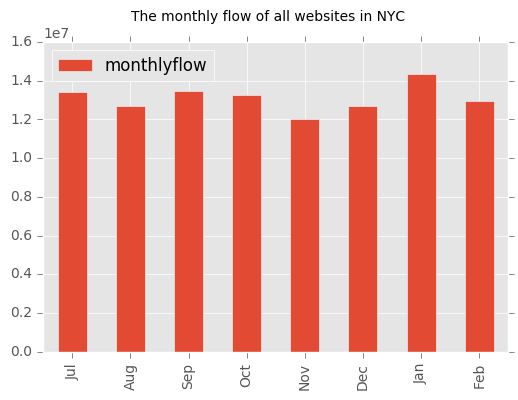

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

df1.plot(kind="bar")
plt.suptitle('The monthly flow of all websites in NYC')

###### JOIN
We find 10 websites with most totaltime in the 8 months by joining the fact table and website dimension table.

In [59]:
%%sql
SELECT webfact.page_id, page, totaltime_min,average_time_viewed
FROM webfact 
JOIN website 
ON webfact.page_id = website.page_id
WHERE page!='NA'
ORDER BY totaltime_min DESC
LIMIT 10;

10 rows affected.


[(5977, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('3061575.6'), 323.3),
 (7979, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('3036981.0'), 317.07),
 (9973, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('3034709.5'), 329.03),
 (13968, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('3010941.5'), 331.45),
 (11968, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('2959659.6'), 330.2),
 (1988, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('2875068.8'), 320.92),
 (3, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('2859234.1'), 313.0),
 (3983, 'http://www1.nyc.gov/assets/finance/jump/pay_parking_camera_violations.html', Decimal('2717376.2'), 324.83),
 (13969, 'http://www1.nyc.gov/site/buildings/', Decimal('2092314.5'), 203.52),
 (5978, 'http://www.nyc.gov/html/dob/html/home/home.shtml', Decimal('1980756.4'), 198.99)]

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

#### We choose the Option A.
#####  What would it take to automate this process? 
When there are data and templates for queries available and people specify which content is desired, the tools will generate SQL accordingly. They can cleanse, extract, transform and then load the data into different tables which people want.

##### How often would you need to update the data? 
The frequency of update of dimension table from OLTP is up to the requirement of the data. For the web analytics data, we would update the data in a monthly basis because the data are monthly flow of websites. 

##### Could you easily automate any data cleaning steps? 
No. When data is to be cleansed, it is necessary to have a set of rules that describe what must occur. In some cases, it is possible to define simple data-driven requirements in tabular format. These may be instantiated as physical tables, allowing the rules to be maintained separately from ETL code. 

##### What checks would you need to put in place to ensure quality? 
Once the type 1 change has been applied, it must also be checked to see whether any type 2 changes have occurred. Likewise, any records that did not contain a type 1 change must also be checked for type 2 changes.
Also, we could add housekeeping columns maintaining information about when each row was created and last adjusted to aid specific ETL or reporting activities. Similarly, housekeeping information can be attached to each row of a fact table as well.

##### Would humans need to be involved, or could you automate it all?
We think that humans need to be involved to specify what contents they want to study and to make sure the requirement of data cleaning. 
